In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

In [ ]:
X = iris["data"]
y = iris["target"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from keras import layers
from keras import regularizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Flatten
from tensorflow.keras.callbacks import ModelCheckpoint

## Regularization
L1 = Lasso(absolute value)

L2 = Ridge(sqaured Magnitude)


In [ ]:
layer = layers.Dense(units=64, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), bias_regularizer=regularizers.L2(1e-4), activity_regularizer=regularizers.L2(1e-5))

In [6]:
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 32

In [7]:
def build_model(rate):
  model = Sequential()
  model.add(Flatten())
  model.add(Dense(10, activation="relu", input_dim=8, input_shape=(4,)))
  model.add(Dropout(rate))
  model.add(Dense(10, activation="relu"))
  model.add(Dropout(rate))
  model.add(Dense(3, activation="softmax"))
  model.compile(loss="sparse_categorical_crossentropy", optimizer="softmax", metrics=["accuracy"])
  return model

# Functional API

In [ ]:
X_input = Input(shape=(4,))
X_dense1 = Dense(20, activation="relu")(X_input)
X_dense2 = Dense(30, activation="relu")(X_dense1)
X_output = Dense(3, activation="softmax")(X_dense2)
concatenate = [X_input, X_dense2]
model = Model(inputs=X_input, outputs=X_output)

In [ ]:
model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 20)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 30)             │           630 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 3)              │            93 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 823 (3.21 KB)

 Trainable params: 823 (3.21 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.3210 - loss: 1.4709 - val_accuracy: 0.3000 - val_loss: 1.3674
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4004 - loss: 1.3346 - val_accuracy: 0.6333 - val_loss: 1.3130
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5931 - loss: 1.3196 - val_accuracy: 0.5000 - val_loss: 1.2734
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4710 - loss: 1.2757 - val_accuracy: 0.4667 - val_loss: 1.2368
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4390 - loss: 1.2772 - val_accuracy: 0.4667 - val_loss: 1.2034
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4498 - loss: 1.1813 - val_accuracy: 0.5000 - val_loss: 1.1753
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5563 - loss: 1.1548 - val_accuracy: 0.5667 - val_loss: 1.1465
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5767 - loss: 1.1766 - val_accuracy: 0.6333 - val_loss:

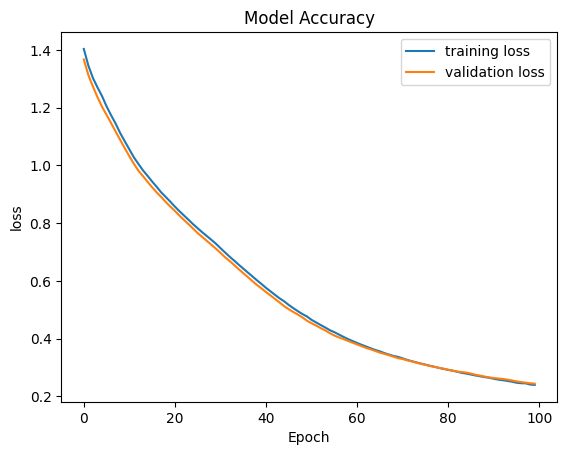

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label = "validation loss")
plt.title("Model Accuracy")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [ ]:
import numpy as np
test_input = np.array([[1, 2, 3, 4]])
sample_output = model.predict(test_input)
sample_output = np.argmax(sample_output) #find most probable value
print(sample_output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
2


In [ ]:
model.save('iris_model.keras')

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('iris_model.keras')

# Functional API